In [3]:
import pandas as pd  # Import Pandas for data manipulation and analysis

import warnings  # Import the warnings module to handle warnings
#warnings.filterwarnings("ignore")  # Filter and suppress warnings

# Import AutoViz_Class for automated visualization
from autoviz import AutoViz_Class

# Import load_dataset and create_report from dataprep for data loading and exploratory data analysis
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report

# Import SHAP for model interpretation
import shap

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import CatBoostClassifier and Pool for gradient boosting
from catboost import Pool, CatBoostClassifier

# Import CountVectorizer for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Import RareLabelEncoder for encoding categorical variables with rare labels
from feature_engine.encoding import RareLabelEncoder

# Import metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score

# Import train_test_split for data splitting
from sklearn.model_selection import train_test_split

# Import Seaborn for advanced visualization
import seaborn as sns

# Import itertools for various iteration-related tasks
import itertools

# Import gc for garbage collection
import gc

# Set Pandas options to display a maximum of 1000 rows
pd.set_option('display.max_rows', 1000)

## Read the data

In [25]:
# Set Pandas options to display a maximum of 1000 rows
pd.set_option('display.max_rows', 1000)
# read the data
data = pd.read_csv('/Users/megavishy/Downloads/salaries.csv')

In [26]:
data.head

<bound method NDFrame.head of        work_year experience_level employment_type         job_title          \
0        2024           SE               FT               AI Data Scientist   
1        2025           SE               FT                    Data Analyst   
2        2025           SE               FT                    Data Analyst   
3        2025           SE               FT                    Data Analyst   
4        2025           SE               FT                    Data Analyst   
...          ...              ...             ...                       ...   
89224    2020           SE               FT                  Data Scientist   
89225    2021           MI               FT        Principal Data Scientist   
89226    2020           EN               FT                  Data Scientist   
89227    2020           EN               CT           Business Data Analyst   
89228    2021           SE               FT                  Data Scientist   

       salary  salary

In [27]:
data.info

<bound method DataFrame.info of        work_year experience_level employment_type         job_title          \
0        2024           SE               FT               AI Data Scientist   
1        2025           SE               FT                    Data Analyst   
2        2025           SE               FT                    Data Analyst   
3        2025           SE               FT                    Data Analyst   
4        2025           SE               FT                    Data Analyst   
...          ...              ...             ...                       ...   
89224    2020           SE               FT                  Data Scientist   
89225    2021           MI               FT        Principal Data Scientist   
89226    2020           EN               FT                  Data Scientist   
89227    2020           EN               CT           Business Data Analyst   
89228    2021           SE               FT                  Data Scientist   

       salary  sala

In [28]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [29]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [35]:
data.size

981519

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,89229.0,2024.041724,0.623501,2020.0,2024.0,2024.0,2024.0,2025.0
salary,89229.0,161846.614699,195885.069464,14000.0,106300.0,147000.0,199100.0,30400000.0
salary_in_usd,89229.0,157513.992962,73433.450671,15000.0,106300.0,146400.0,198072.0,800000.0
remote_ratio,89229.0,21.541203,41.010029,0.0,0.0,0.0,0.0,100.0


## preprocessing

In [33]:
data.duplicated().sum()

44858

In [36]:
data  = data.drop_duplicates()

In [39]:
# verify
data.duplicated().sum()

0

In [40]:
for columns in data.columns:
    print(f"\n unique values in{columns}:")
    print(data[columns].unique())


 unique values inwork_year:
[2024 2025 2022 2023 2020 2021]

 unique values inexperience_level:
['SE' 'MI' 'EN' 'EX']

 unique values inemployment_type:
['FT' 'PT' 'CT' 'FL']

 unique values injob_title:
['AI Data Scientist' 'Data Analyst' 'Machine Learning Engineer'
 'Data Engineer' 'AI Engineer' 'Robotics Engineer' 'Engineer'
 'Analytics Engineer' 'Data Specialist' 'Manager' 'Software Engineer'
 'Analyst' 'Research Scientist' 'Developer' 'Stage' 'Consultant'
 'Copywriter' 'Data Scientist' 'Business Intelligence Analyst'
 'Data Architect' 'AI Developer' 'Software Development Engineer'
 'Applied Scientist' 'Bioinformatics Scientist'
 'Business Intelligence Engineer' 'Data Integration Specialist'
 'Business Intelligence Developer' 'Head of AI'
 'Member of Technical Staff' 'Product Manager'
 'Machine Learning Researcher' 'Platform Engineer' 'Product Designer'
 'Solution Architect' 'Research Analyst' 'Associate' 'Systems Engineer'
 'Customer Success Manager' 'Computational Biologist'
 'A

In [53]:
# check for null values and replace them
print("\n total null values in dataset:")
print(data.isnull().sum())

#use for loop for quick null handling
for columns in data.columns:
    null_count = data.isnull().sum()
    if null_count > 0:
        print(f"\n {columns}:")
        print(f"\n Null count :{null_count}")
        print(f"Null percentage {(null_count/len(data))*100:.2f}%")

#create flags
data[f"{columns}_null_flag"] = data[columns].isnull()
if data[column].dtype in ['foat64','int64']:
    data[column] = data[column].fillna(data[column].mean())
else:
    data[column] = data[column].fillna(data[column].mode()[0])



 total null values in dataset:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## visualization

In [55]:
#create frequency plots

In [60]:
%matplotlib inline

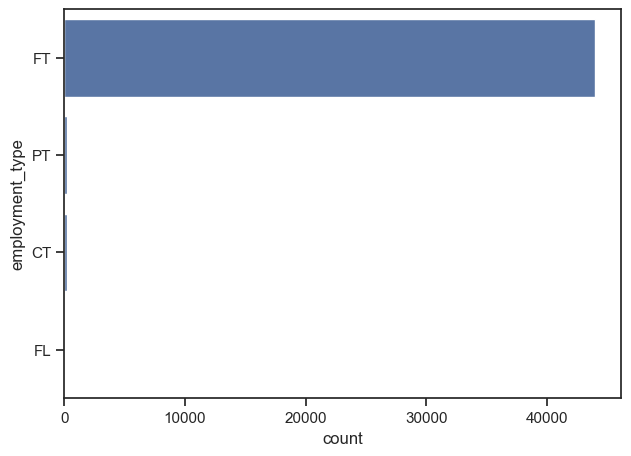

In [64]:
sns.countplot(data['employment_type'])
plt.show()

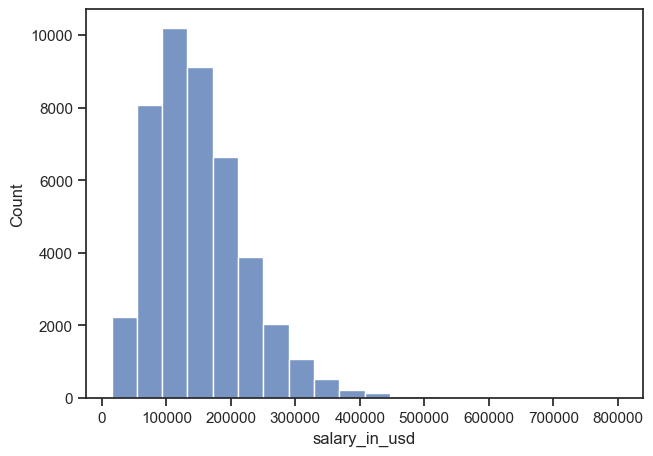

In [66]:
sns.histplot(data['salary_in_usd'],kde = False, bins =20)
plt.show()

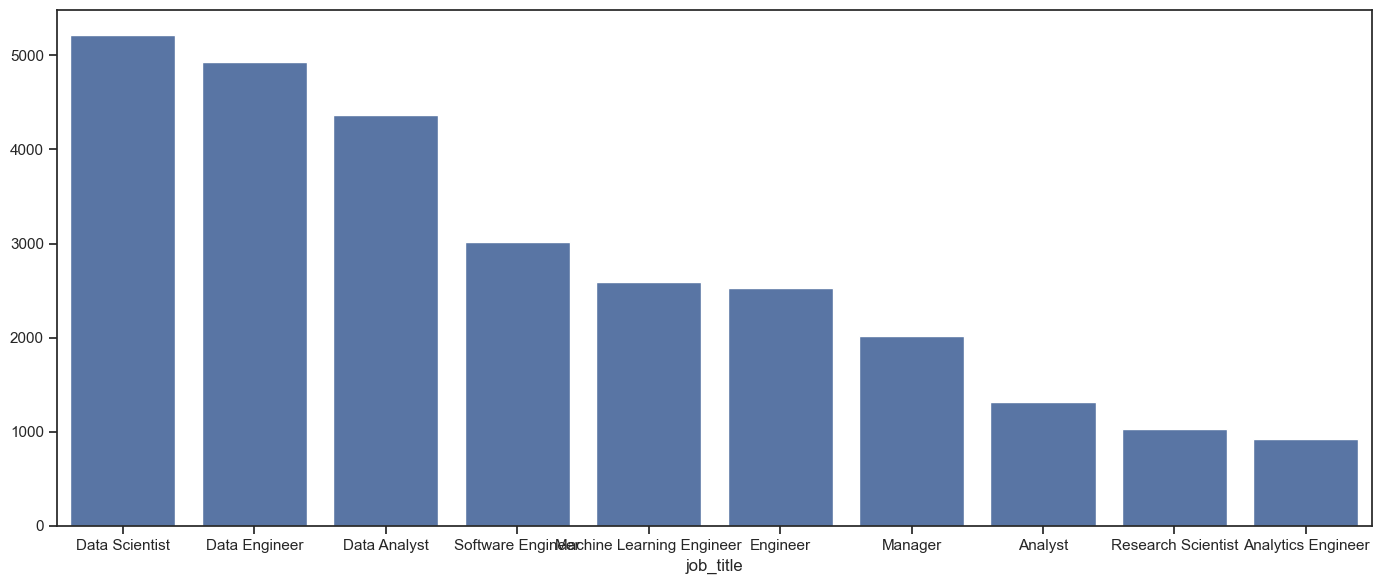

In [73]:
data_1_job_titles = data['job_title'].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x = data_1_job_titles.index, y = data_1_job_titles.values)
plt.tight_layout()
plt.show()

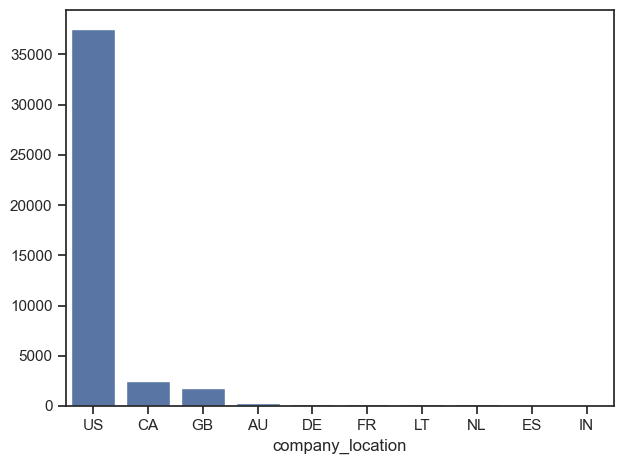

In [76]:
data_top_location = data['company_location'].value_counts().head(10)

sns.barplot(x = data_top_location.index, y = data_top_location.values)
plt.tight_layout()
plt.show()

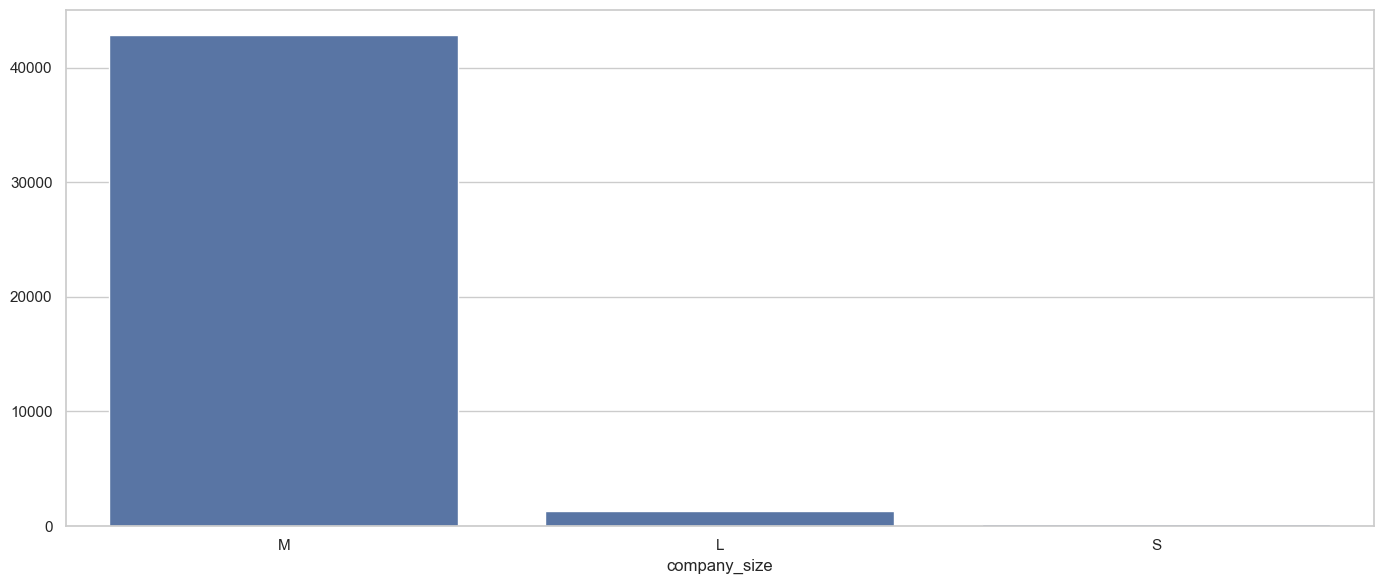

In [96]:
data_1_job_titles = data['company_size'].value_counts()

plt.figure(figsize=(14, 6))
sns.barplot(x = data_1_job_titles.index, y = data_1_job_titles.values)
plt.tight_layout()
plt.show()

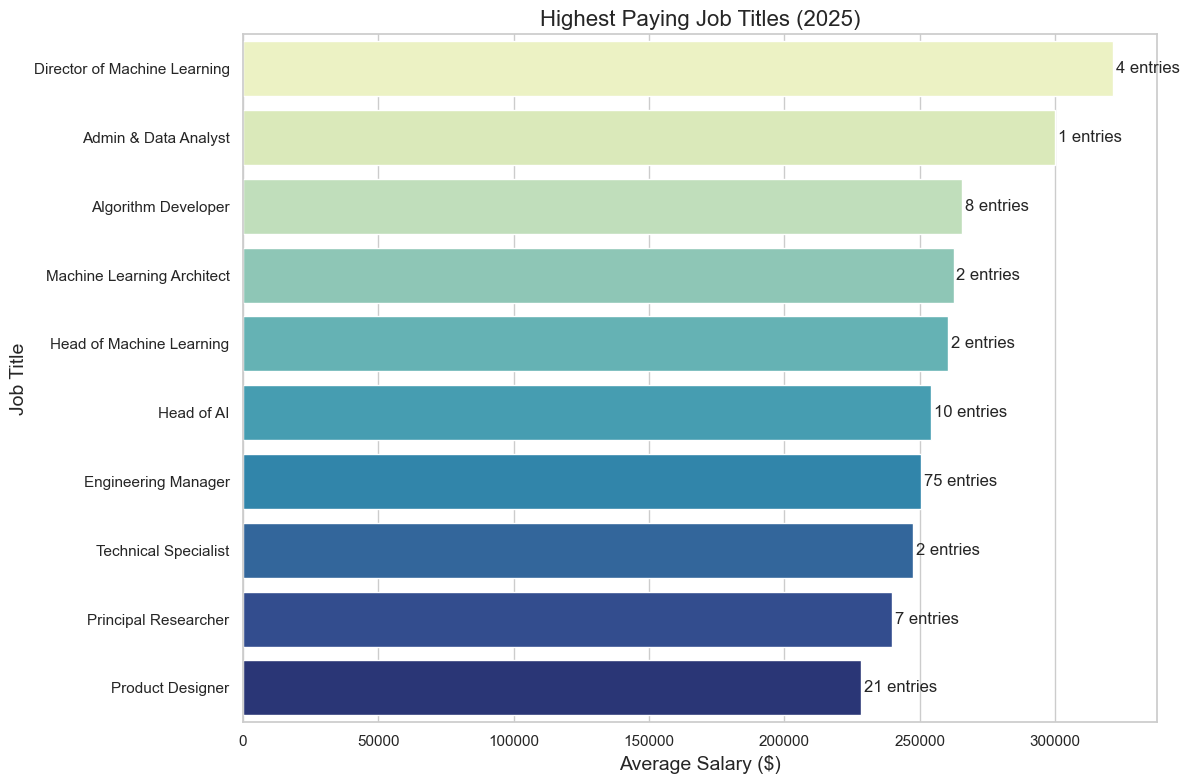

In [93]:
# Set visual style
sns.set_style("whitegrid")

# Calculate average salary by job title and year
salary_analysis = data.groupby(['work_year', 'job_title']).agg({
    'salary': ['mean', 'count']
}).reset_index()

# Important: Flatten the multi-index columns explicitly
salary_analysis.columns = ['work_year', 'job_title', 'mean_salary', 'count']

# Get top 10 highest paying job titles in the most recent year
latest_year = data['work_year'].max()
top_salary_jobs = (
    salary_analysis[salary_analysis['work_year'] == latest_year]
    .sort_values('mean_salary', ascending=False)
    .head(10)
)

# Create the visualization
plt.figure(figsize=(12, 8))

# Create bar chart
bars = sns.barplot(
    y='job_title', 
    x='mean_salary', 
    data=top_salary_jobs,
    palette='YlGnBu'  # Color ramp from yellow to green to blue
)

# Ensure grid is visible
plt.grid(True, axis='x')  # Explicit grid on x-axis

# Add count as text on each bar for context
for i, (salary, count) in enumerate(zip(top_salary_jobs['mean_salary'], top_salary_jobs['count'])):
    bars.text(salary + 1000, i, f"{count} entries", va='center')

plt.title(f'Highest Paying Job Titles ({latest_year})', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.tight_layout()
plt.show()

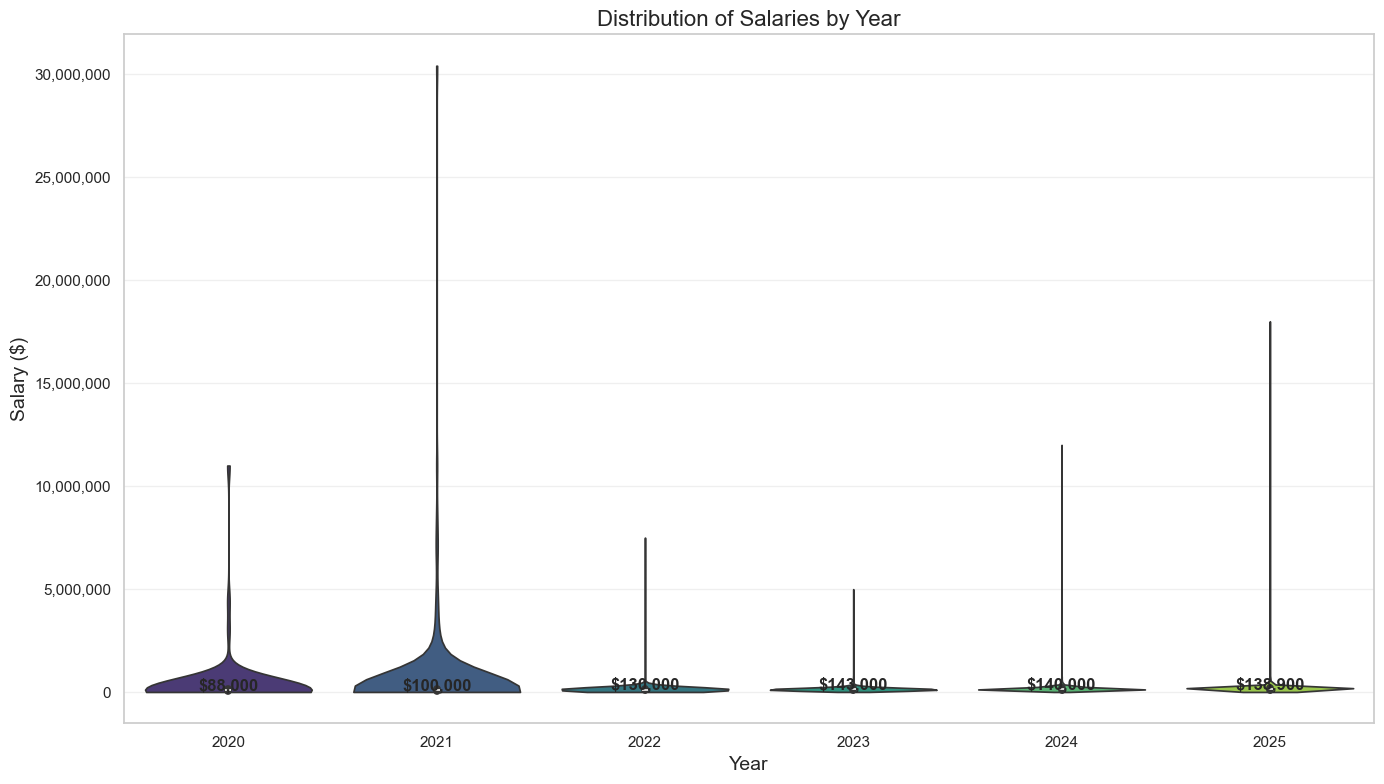

In [102]:
# Set visual style
sns.set_style("whitegrid")

# Create figure with appropriate size
plt.figure(figsize=(14, 8))

# Create a violin plot to show distribution of salaries by year
# We use violin plot instead of boxplot to better see the distribution shape
ax = sns.violinplot(
    x='work_year', 
    y='salary',
    data=data,
    palette='viridis',
    # Show quartile lines inside the violins
    cut=0              # Limit the violin range to the data range
)

# Add a swarm plot on top to show individual data points (optional, can be removed if dataset is large)
# sns.swarmplot(x='work_year', y='salary', data=data, color='white', edgecolor='gray', size=2, alpha=0.5)

# Enhance the plot with more details
plt.title('Distribution of Salaries by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Salary ($)', fontsize=14)

# Format y-axis with commas for thousands
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# Add grid lines for better readability
plt.grid(True, axis='y', alpha=0.3)

# Add median values on top of each violin
for i, year in enumerate(sorted(data['work_year'].unique())):
    year_data = data[data['work_year'] == year]['salary']
    median = year_data.median()
    plt.text(i, median + 5000, f'${median:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Rare label encoder

In [109]:
# List of categorical columns to process
categorical_cols = ['job_title', 'company_size', 'employment_type', 'residence_location']

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = data.copy()

# Process each categorical column
for column in categorical_cols:
    # Skip if column is not in DataFrame
    if column not in data.columns:
        print(f"Column '{column}' not found in the DataFrame. Skipping.")
        continue
        
    # Fill NaN values and convert to string
    df_encoded[column] = df_encoded[column].fillna('Missing').astype(str)
    
    # Count occurrences of each category
    value_counts = df_encoded[column].value_counts()
    
    # Set the minimum count threshold
    min_count = 15
    
    # Identify rare categories (those appearing less than min_count times)
    rare_categories = value_counts[value_counts < min_count].index.tolist()
    
    # Replace rare categories with 'Other'
    if rare_categories:
        # Create a mapping dictionary for faster replacement
        mapping = {cat: 'Other' for cat in rare_categories}
        
        # Apply the mapping using replace method
        df_encoded[column] = df_encoded[column].replace(mapping)
    
    # Print summary of changes
    print(f"Column '{column}': Replaced {len(rare_categories)} rare categories with 'Other'")

# Check the result
print("\nUnique values in encoded columns:")
for column in categorical_cols:
    if column in data.columns:
        print(f"{column}: {df_encoded[column].nunique()} (was {data[column].nunique()} before encoding)")

Column 'job_title': Replaced 167 rare categories with 'Other'
Column 'company_size': Replaced 0 rare categories with 'Other'
Column 'employment_type': Replaced 0 rare categories with 'Other'
Column 'residence_location' not found in the DataFrame. Skipping.

Unique values in encoded columns:
job_title: 147 (was 313 before encoding)
company_size: 3 (was 3 before encoding)
employment_type: 4 (was 4 before encoding)


In [117]:

import numpy as np # Set the target variable (what we want to predict)
label = 'salary_in_usd'
df = df_encoded
# Extract the target variable and features from the DataFrame
y = df[label].values.reshape(-1,)  # Target variable (salaries)
X = df.drop([label], axis=1)       # Features (everything else)

# Identify categorical columns in the feature set
cat_cols = X.select_dtypes(include=['object']).columns

# Get the indices of categorical columns in the feature set
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.5, 
    random_state=0, 
    #stratify=df[['residence_location']]
)

# Print the shapes of the training and testing sets to verify the split
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

Training set shapes - X_train: (22185, 10), y_train: (22185,)
Testing set shapes - X_test: (22186, 10), y_test: (22186,)


In [121]:
# Import necessary libraries
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
import numpy as np

# Create data pools with categorical features
train_pool = Pool(X_train, y_train, cat_features=cat_cols_idx)
test_pool = Pool(X_test, y_test, cat_features=cat_cols_idx)

# Initialize and configure model
model = CatBoostRegressor(
    iterations=10000,
    depth=5,
    learning_rate=0.008,
    loss_function='RMSE',
    early_stopping_rounds=100,
    verbose=0
)

# Train model
model.fit(train_pool, eval_set=test_pool)

# Make predictions
y_train_pred = model.predict(train_pool)
y_test_pred = model.predict(test_pool)

# Calculate error metrics
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print results
print(f"RMSE score - Train: {rmse_train:.1f} kUSD/year, Test: {rmse_test:.1f} kUSD/year")

# Baseline scores (assuming the same prediction for all data samples)
# Calculating RMSE for training and test sets using mean value prediction
rmse_bs_train = mean_squared_error(y_train, [np.mean(y_train)] * len(y_train), squared=False)
rmse_bs_test = mean_squared_error(y_test, [np.mean(y_train)] * len(y_test), squared=False)

# Print baseline results
print(f"RMSE baseline score - Train: {rmse_bs_train:.1f} kUSD/year, Test: {rmse_bs_test:.1f} kUSD/year")

# Calculate improvement over baseline
train_improvement = (rmse_bs_train - rmse_train) / rmse_bs_train * 100
test_improvement = (rmse_bs_test - rmse_test) / rmse_bs_test * 100
print(f"Model improvement over baseline - Train: {train_improvement:.1f}%, Test: {test_improvement:.1f}%")

RMSE score - Train: 5093.8 kUSD/year, Test: 5245.4 kUSD/year
RMSE baseline score - Train: 77532.6 kUSD/year, Test: 77142.5 kUSD/year
Model improvement over baseline - Train: 93.4%, Test: 93.2%


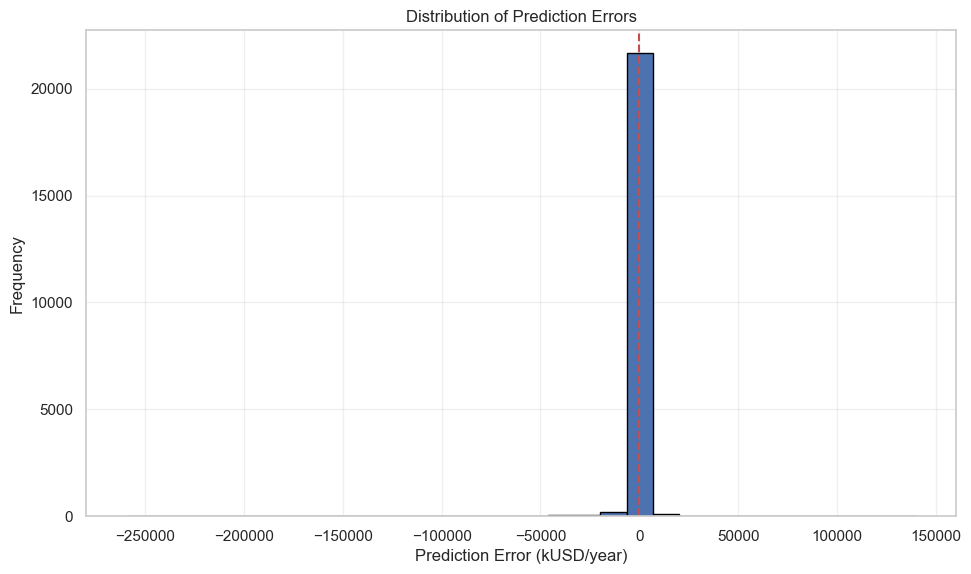

In [122]:
errors = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error (kUSD/year)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True, alpha=0.3)
plt.show()

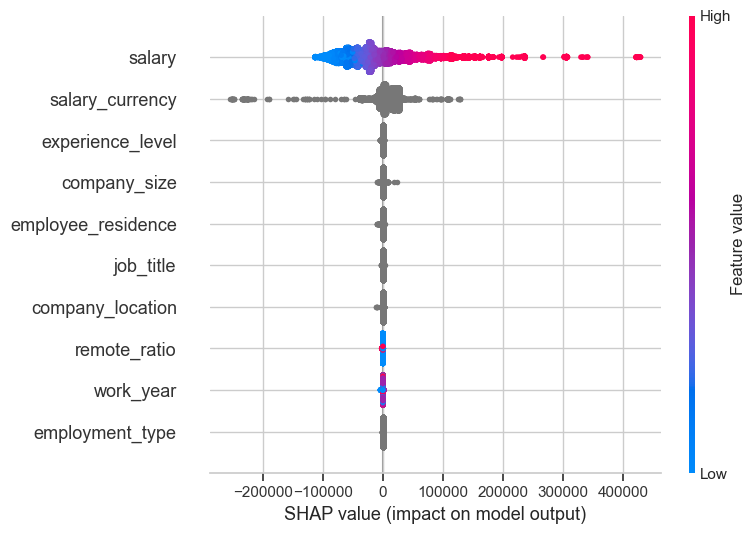

In [123]:
%matplotlib inline
# Initialize the SHAP JavaScript visualization library
shap.initjs()

# Create a SHAP TreeExplainer for the given 'model'
ex = shap.TreeExplainer(model)

# Compute SHAP values for the test dataset 'X_test' using the TreeExplainer
shap_values = ex.shap_values(X_test)

# Generate a summary plot of SHAP values to visualize feature contributions
shap.summary_plot(shap_values, X_test)

In [124]:
# Accessing the expected values from the 'ex' object, assuming it contains the expected values.
expected_values = ex.expected_value

# Printing the average predicted salary rounded to one decimal place in kilo USD per year.
print(f"Average predicted salary is {round(expected_values, 1)} kUSD/year")

# Calculating and printing the average actual salary from the 'y_test' array, rounded to one decimal place in kilo USD per year.
print(f"Average actual salary is {round(np.mean(y_test), 1)} kUSD/year")

Average predicted salary is 150813.6 kUSD/year
Average actual salary is 151901.9 kUSD/year
